Accuracy: 63.33%


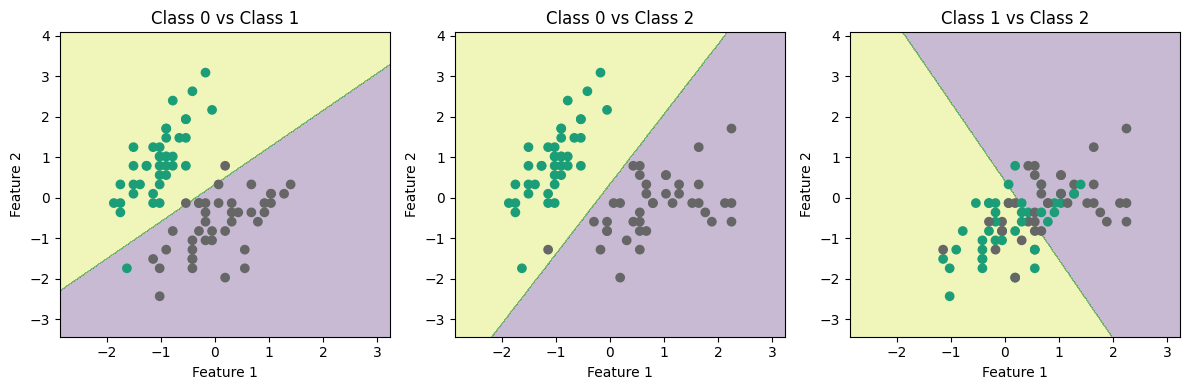

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid neuron model
class SigmoidNeuron:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Gradient descent updates
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        y_predicted_classes = np.round(y_predicted)
        return y_predicted_classes

# Function to plot the data points and decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    classes = np.unique(y)
    num_classes = len(classes)

    plt.figure(figsize=(12, 4))

    idx = 1  # Subplot index

    for i in range(num_classes):
        for j in range(i + 1, num_classes):
            plt.subplot(1, 3, idx)
            X_filtered = X[(y == classes[i]) | (y == classes[j])]
            y_filtered = y[(y == classes[i]) | (y == classes[j])]
            model.fit(X_filtered, (y_filtered == classes[i]).astype(int), epochs=1000, learning_rate=0.01)

            Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.3)
            plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, cmap='Dark2')

            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.title(f'Class {classes[i]} vs Class {classes[j]}')

            idx += 1

    plt.tight_layout()
    plt.show()


# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = SigmoidNeuron()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
acc = accuracy(y_test, y_pred)
print(f'Accuracy: {acc*100:.2f}%')

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, model)
